In [142]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签
plt.rcParams['axes.unicode_minus']=False   #正常显示负号
%matplotlib inline  

In [144]:
# 路径名
data_path = '..\data'
# 文件名
file_name = 'raw_data.csv'
file_name = os.path.join(data_path,file_name)
with open(file_name,'r',encoding='utf-8') as f:
    raw_data = pd.read_csv(f)

In [ ]:
raw_data.index = raw_data['time']
raw_data.drop(index='2014',inplace=True)
#print(raw_data.columns)

数据解释
- 时间
- 人民币兑美元即期汇率,中国银行隔夜利率,中国银行间隔夜利率,美国银行间隔夜利率,
- 中国工业增加值同比增长率,美国工业增加值同比增长率,中国cpi,美国cpi,中国m2同比变化率,美国m2同比变化率,中国政治经济学不稳定指数,美国政治经济学不稳定指数
- 中国工业增加值增速hp滤波后最为产出缺口代理变量（R语言实现），美国产出缺口代理变量
- 外汇占款余额的对数变动，资本流动
- 中国股价的对数变化率，美国股价的对数变化率



In [147]:
raw_data['year'] = [i[-4:] for i in np.array(raw_data['time'])]
raw_data['month'] = ([str(i) for i in range(1,13)]*14)[:-1]
raw_data.head()

,time,exchange,c_bank_rate,u_bank_rate,c_industry_add_rate,u_industry_add_rate,c_cpi,u_cpi,c_m2_yoy,u_m2_yoy,c_epu_ln,u_epu_ln,c_gap,u_gap,dlnforeignbalance,capitalflowout,dln_c_stock,dln_u_stock,year,month
time,,,,,,,,,,,,,,,,,,,,
Jan-2005,Jan-2005,5.741,1.907100,2.279355,20.9,3.15,69.2,80.5,13.56,5.61,4.120976,4.026317,4.786250,-0.016659,NaN,NaN,NaN,NaN,2005,1
Feb-2005,Feb-2005,5.732,2.073913,2.501786,7.6,3.33,69.1,80.9,13.28,5.07,3.478088,4.053322,-7.194137,-0.120420,0.024277,-1552.486834,0.091487,0.025998,2005,2
Mar-2005,Mar-2005,5.868,1.801796,2.629032,15.1,3.92,69.6,81.6,13.29,4.60,4.337985,4.023648,0.428913,0.189984,0.030554,-2172.615428,-0.100404,-0.024681,2005,3
Apr-2005,Apr-2005,5.805,1.299877,2.785000,16.0,3.83,70.2,82.1,13.34,4.17,3.942397,4.351597,0.857374,-0.141177,0.013339,-2228.658868,-0.018878,-0.030080,2005,4
May-2005,May-2005,5.785,1.324672,3.002581,16.6,3.68,70.4,82.0,13.66,3.19,4.891832,4.379587,0.885987,-0.507130,0.041295,-3339.560194,-0.088720,0.026620,2005,5


In [148]:
raw_data.tail()

,time,exchange,c_bank_rate,u_bank_rate,c_industry_add_rate,u_industry_add_rate,c_cpi,u_cpi,c_m2_yoy,u_m2_yoy,c_epu_ln,u_epu_ln,c_gap,u_gap,dlnforeignbalance,capitalflowout,dln_c_stock,dln_u_stock,year,month
time,,,,,,,,,,,,,,,,,,,,
Jul-2018,Jul-2018,6.521,2.379573,1.910000,6.0,2.41,108.8,106.3,8.21,3.84,6.028274,5.052788,-0.105202,-0.090221,0.000503,-18688.39600,0.010126,0.046048,2018,7
Aug-2018,Aug-2018,6.583,2.231487,1.914839,6.1,3.25,109.0,106.4,7.87,3.90,6.305937,4.869420,0.078383,0.535946,-0.000111,-19067.89299,-0.053979,0.021396,2018,8
Sep-2018,Sep-2018,6.802,2.511657,1.954667,5.8,3.55,109.4,106.5,7.93,3.80,6.242384,4.781273,-0.092326,0.822529,-0.005562,-23537.55412,0.034655,0.018828,2018,9
Oct-2018,Oct-2018,6.789,2.348428,2.187742,5.9,2.10,109.8,106.7,7.66,3.67,6.375100,5.016315,0.165870,-0.403842,-0.004287,-24667.80496,-0.080635,-0.052075,2018,10
Nov-2018,Nov-2018,6.773,2.435486,2.197667,5.4,1.94,109.8,106.3,7.63,3.77,6.555565,5.165414,-0.140747,-0.272170,-0.002684,-31771.25793,-0.005621,0.016690,2018,11


In [149]:
raw_data['mtime'] = pd.to_datetime(raw_data.index)

In [167]:
# 画图函数
def plot_line(dataframe_,columns_=['je'],legend_=['汇率'],title_=''):
    df_tmp = dataframe_.copy()
    '''
    dataframe_ : pandas的dataframe
    columns_   : 需要画图的列，list格式
    legend_    : 需要画图的列明，即图例，list格式
    title_     ：图的名称，保存在本地需要此命名
    '''
    # 背景
    #fig=plt.figure(figsize=(6.4,4.8), dpi=100)  # 多图
    #ax = fig.add_subplot(111) # mnx，m行n列第x个
    fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=100)
    # x轴
    xlab = pd.to_datetime(list(map(str,df_tmp.index)))    
    # x轴旋转
    #plt.xticks(rotation=320)
    marker_ = [',','*','.','+','x',]
    linestyle_ = ['-','-.']
    # 画线
    for i,j in enumerate(columns_):
        ax.plot(xlab,df_tmp[j],linestyle=linestyle_[i],marker=marker_[0],markersize='5',label=legend_[i]) # lw=3,marker='.'
    # 标题
    #plt.title(title_,fontsize=10)
    plt.tick_params(labelsize=10,axis='both')  # 刻度的大小
    #plt.legend(prop={'size':15},loc='best')  # 图例
    plt.legend(prop={'size':15},loc='upper left')  # 图例
    #显示网格
    ax.grid(True, linestyle='-.')
    #ax.yaxis.grid(True, linestyle='-.')
    plt.margins(0,0)
    fig.savefig(f'{title_}.png',bbox_inches = 'tight')
    plt.show()

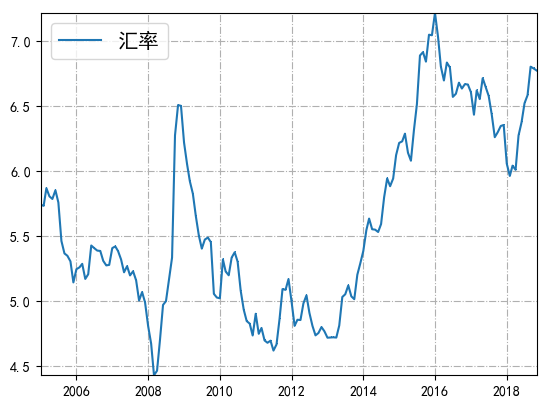

In [168]:
plot_line(raw_data,['exchange'],['汇率'],'汇率月度数据')

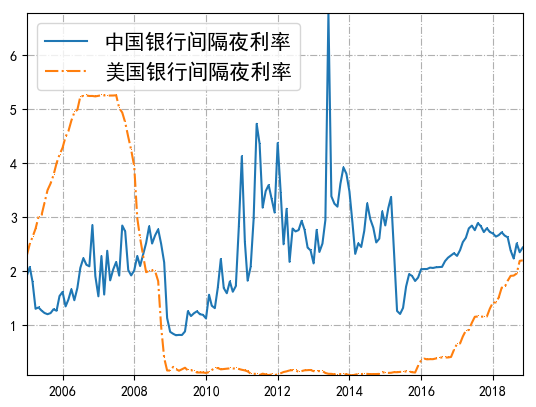

In [158]:
plot_line(raw_data,['c_bank_rate','u_bank_rate'],['中国银行间隔夜利率','美国银行间隔夜利率'],'银行间隔夜利率')

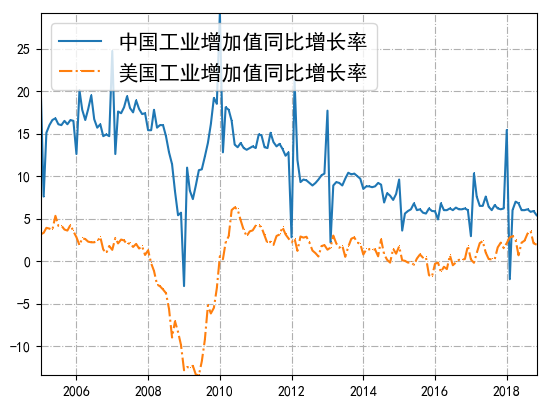

In [159]:
plot_line(raw_data,['c_industry_add_rate','u_industry_add_rate'],['中国工业增加值同比增长率','美国工业增加值同比增长率'],'工业增加值同比增长率')

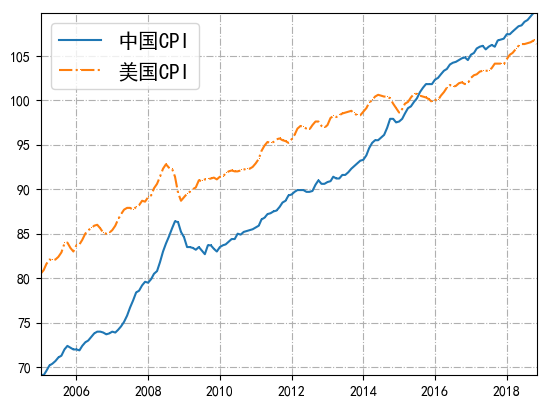

In [160]:
plot_line(raw_data,['c_cpi','u_cpi'],['中国CPI','美国CPI'],'CPI')

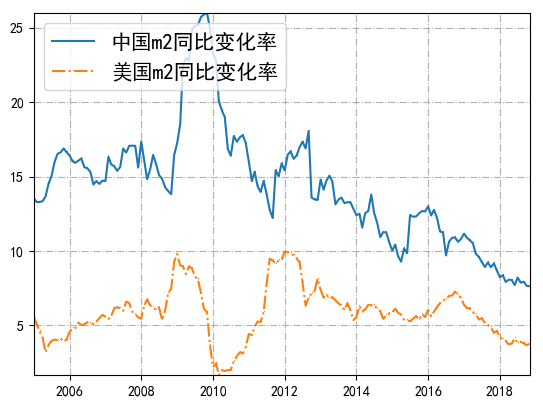

In [161]:
plot_line(raw_data,['c_m2_yoy','u_m2_yoy'],['中国m2同比变化率','美国m2同比变化率'],'m2')

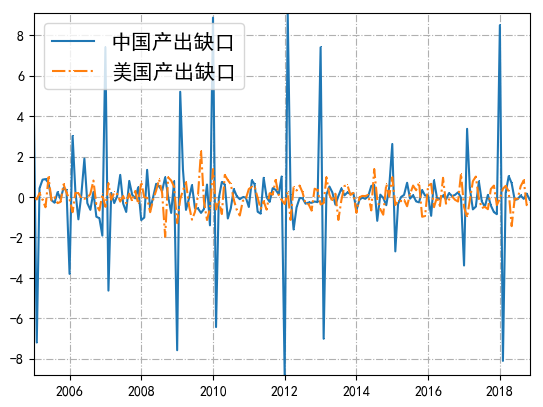

In [162]:
plot_line(raw_data,['c_gap','u_gap'],['中国产出缺口','美国产出缺口'],'产出缺口')

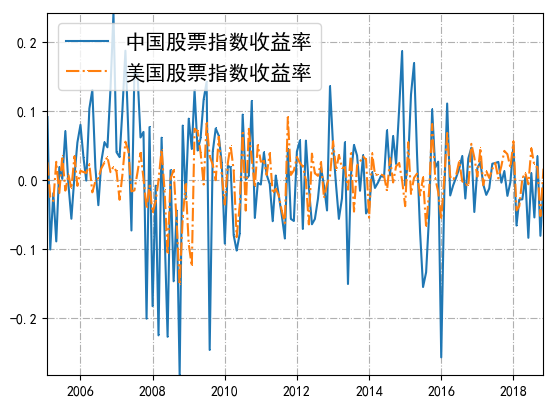

In [163]:
plot_line(raw_data,['dln_c_stock','dln_u_stock'],['中国股票指数收益率','美国股票指数收益率'],'股票指数收益率')

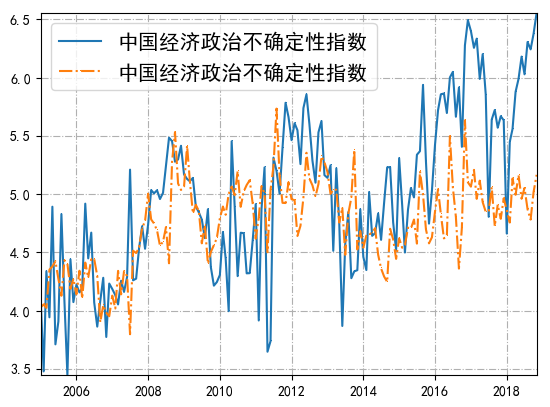

In [164]:
plot_line(raw_data,['c_epu_ln','u_epu_ln'],['中国经济政治不确定性指数','中国经济政治不确定性指数'],'经济政治不确定性指数')

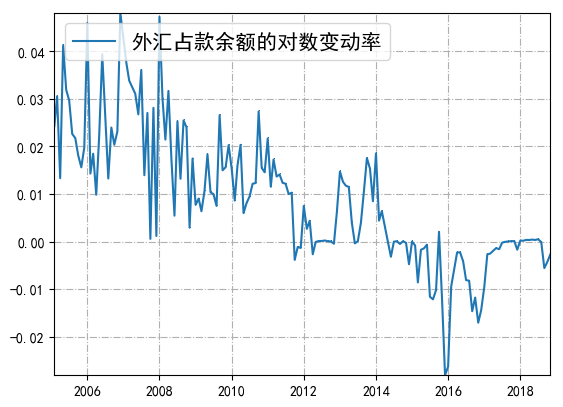

In [165]:
plot_line(raw_data,['dlnforeignbalance',],['外汇占款余额的对数变动率'],'外汇占款余额的对数变动率')

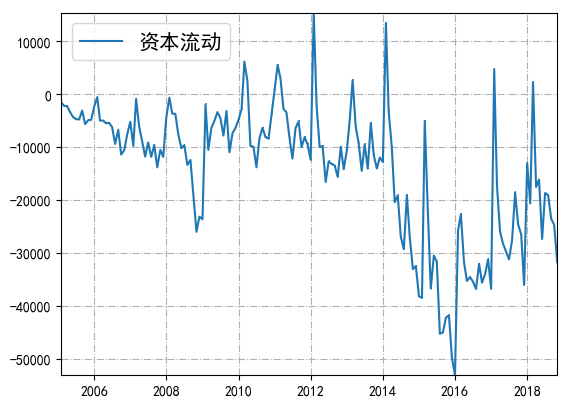

In [166]:
plot_line(raw_data,['capitalflowout',],['资本流动'],'资本流动')

In [73]:
np.log(100) - np.log(90) # log 是e底，求差为变化率

0.10536051565782678

In [58]:
# 汇率对数化
raw_data['ln_exchange'] = np.log(raw_data['exchange'])

In [59]:
raw_data.head()

,time,exchange,c_bank_rate,u_bank_rate,c_industry_add_rate,u_industry_add_rate,c_cpi,u_cpi,c_m2_yoy,u_m2_yoy,...,u_epu_ln,c_gap,u_gap,dlnforeignbalance,capitalflowout,dln_c_stock,dln_u_stock,year,month,ln_exchange
time,,,,,,,,,,,,,,,,,,,,,
Jan-2005,Jan-2005,5.741,1.907100,2.279355,20.9,3.15,69.2,80.5,13.56,5.61,...,4.026317,4.786250,-0.016659,NaN,NaN,NaN,NaN,2005,1,1.747633
Feb-2005,Feb-2005,5.732,2.073913,2.501786,7.6,3.33,69.1,80.9,13.28,5.07,...,4.053322,-7.194137,-0.120420,0.024277,-1552.486834,0.091487,0.025998,2005,2,1.746065
Mar-2005,Mar-2005,5.868,1.801796,2.629032,15.1,3.92,69.6,81.6,13.29,4.60,...,4.023648,0.428913,0.189984,0.030554,-2172.615428,-0.100404,-0.024681,2005,3,1.769514
Apr-2005,Apr-2005,5.805,1.299877,2.785000,16.0,3.83,70.2,82.1,13.34,4.17,...,4.351597,0.857374,-0.141177,0.013339,-2228.658868,-0.018878,-0.030080,2005,4,1.758720
May-2005,May-2005,5.785,1.324672,3.002581,16.6,3.68,70.4,82.0,13.66,3.19,...,4.379587,0.885987,-0.507130,0.041295,-3339.560194,-0.088720,0.026620,2005,5,1.755268


In [61]:
standerd_data = pd.DataFrame(index=raw_data.index)
#columns=['time','ln_exchange','delta_bank_ret','delta_lncpi','delta_m2yoy']

In [1]:
# 数据差分

In [62]:
standerd_data['time'] = raw_data['time']
standerd_data['ln_exchange'] = raw_data['ln_exchange']
standerd_data['delta_bank_ret'] = raw_data['c_bank_rate'] - raw_data['u_bank_rate']
standerd_data['delta_lncpi'] = raw_data['c_cpi'] - raw_data['u_cpi']
standerd_data['delta_gap'] = raw_data['c_gap'] - raw_data['u_gap']
standerd_data['delta_m2yoy'] = raw_data['c_m2_yoy'] - raw_data['u_m2_yoy']
standerd_data['delta_industryaddrate'] = raw_data['c_industry_add_rate'] - raw_data['u_industry_add_rate']
standerd_data['dln_foreign_exch_balance'] = raw_data['dlnforeignbalance']
standerd_data['capitalflowout'] = raw_data['capitalflowout']
standerd_data['delta_dln_stock_price'] = raw_data['dln_c_stock'] - raw_data['dln_u_stock']

In [63]:
standerd_data.head()

,time,ln_exchange,delta_bank_ret,delta_lncpi,delta_gap,delta_m2yoy,delta_industryaddrate,dln_foreign_exch_balance,capitalflowout,delta_dln_stock_price
time,,,,,,,,,,
Jan-2005,Jan-2005,1.747633,-0.372255,-11.3,4.802909,7.95,17.75,NaN,NaN,NaN
Feb-2005,Feb-2005,1.746065,-0.427872,-11.8,-7.073717,8.21,4.27,0.024277,-1552.486834,0.065490
Mar-2005,Mar-2005,1.769514,-0.827237,-12.0,0.238929,8.69,11.18,0.030554,-2172.615428,-0.075723
Apr-2005,Apr-2005,1.758720,-1.485123,-11.9,0.998551,9.17,12.17,0.013339,-2228.658868,0.011202
May-2005,May-2005,1.755268,-1.677908,-11.6,1.393117,10.47,12.92,0.041295,-3339.560194,-0.115340


In [64]:
out_file_name = 'standerd_data.csv'
standerd_data.to_csv(os.path.join(data_path,out_file_name),index=None)

In [66]:
standerd_data_ = standerd_data.copy()
standerd_data_.drop(['time'],axis=1,inplace=True)
standerd_data_ = standerd_data_ - standerd_data_.shift(1)
standerd_data_['time'] = standerd_data['time']

In [67]:
standerd_data_.head()

,ln_exchange,delta_bank_ret,delta_lncpi,delta_gap,delta_m2yoy,delta_industryaddrate,dln_foreign_exch_balance,capitalflowout,delta_dln_stock_price,time
time,,,,,,,,,,
Jan-2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan-2005
Feb-2005,-0.001569,-0.055618,-0.5,-11.876626,0.26,-13.48,NaN,NaN,NaN,Feb-2005
Mar-2005,0.023449,-0.399364,-0.2,7.312647,0.48,6.91,0.006276,-620.128594,-0.141213,Mar-2005
Apr-2005,-0.010794,-0.657886,0.1,0.759621,0.48,0.99,-0.017215,-56.043440,0.086926,Apr-2005
May-2005,-0.003451,-0.192786,0.3,0.394566,1.30,0.75,0.027957,-1110.901326,-0.126543,May-2005


In [69]:
out_file_name = 'standerd_data_d.csv'
standerd_data_
standerd_data_.to_csv(os.path.join(data_path,out_file_name),index=None)